In [ ]:
!pip install pycaret

In [ ]:
from pycaret.classification import *

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
columns = [
    "age", "workclass", "fnlwgt", "education", "education_num",
    "marital_status", "occupation", "relationship", "race", "sex",
    "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"
]

path = '/content/adult.data'
df = pd.read_csv(path,names=columns)

test_df = pd.read_csv('/content/adult.test',names=columns,skiprows=[0,0])

df.shape, test_df.shape

((25776, 15), (16281, 15))

In [3]:
df.sample(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
11395,46,Private,182689,Some-college,10.0,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
16940,18,Private,220836,11th,7.0,Never-married,Other-service,Not-in-family,White,Female,0.0,0.0,20.0,United-States,<=50K
7458,21,Private,197583,Some-college,10.0,Never-married,Adm-clerical,Own-child,White,Female,0.0,0.0,20.0,United-States,<=50K
15887,35,Private,252897,Assoc-acdm,12.0,Never-married,Adm-clerical,Not-in-family,White,Female,14344.0,0.0,40.0,United-States,>50K
8066,61,Self-emp-not-inc,133969,HS-grad,9.0,Married-civ-spouse,Sales,Husband,Asian-Pac-Islander,Male,0.0,0.0,63.0,South,<=50K
1410,48,Private,329778,HS-grad,9.0,Widowed,Other-service,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
23581,37,Federal-gov,143547,Bachelors,13.0,Never-married,Prof-specialty,Not-in-family,White,Female,0.0,0.0,40.0,United-States,<=50K
906,37,Private,211154,Some-college,10.0,Divorced,Machine-op-inspct,Not-in-family,White,Male,0.0,0.0,52.0,United-States,<=50K
7413,55,Self-emp-not-inc,183810,Masters,14.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,55.0,United-States,>50K
8594,28,Private,215955,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,3103.0,0.0,40.0,United-States,>50K


<Axes: xlabel='age', ylabel='count'>

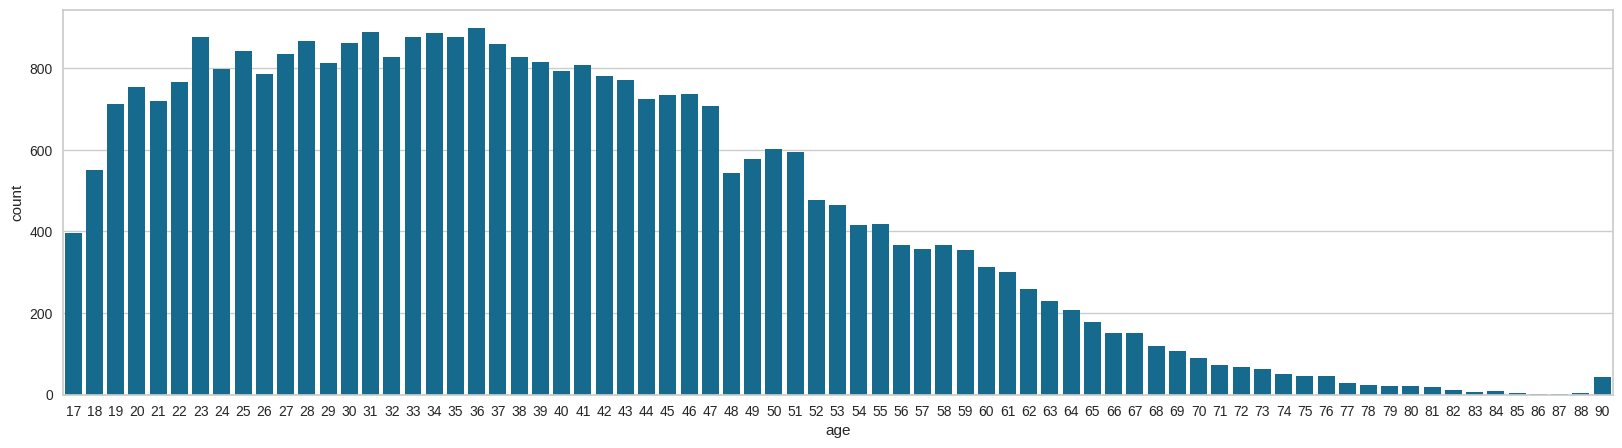

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(x='age',data=df)

<Axes: xlabel='age'>

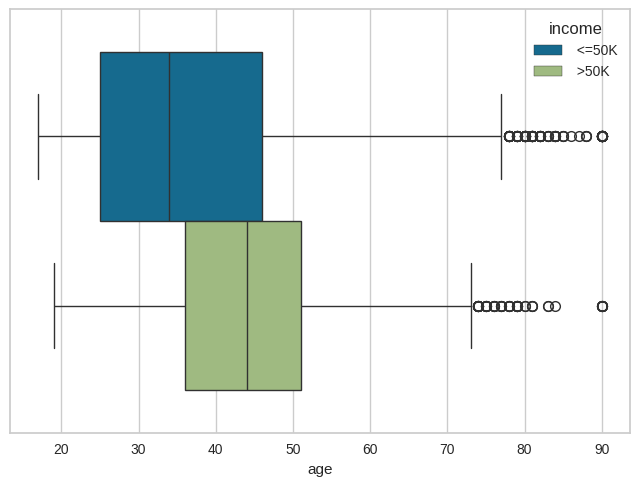

In [ ]:
sns.boxplot(x='age',data=df,hue='income')

In [ ]:
s = setup(df,target='income',session_id=123)

,Description,Value
0,Session id,123
1,Target,income
2,Target type,Binary
3,Target mapping,"<=50K: 0, >50K: 1"
4,Original data shape,"(32561, 15)"
5,Transformed data shape,"(32561, 67)"
6,Transformed train set shape,"(22792, 67)"
7,Transformed test set shape,"(9769, 67)"
8,Numeric features,6
9,Categorical features,8


In [ ]:
best = compare_models(sort='auc')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8716,0.9274,0.8716,0.8674,0.8680,0.6303,0.6338,2.2660
xgboost,Extreme Gradient Boosting,0.8672,0.9248,0.8672,0.8631,0.8640,0.6204,0.6229,1.0380
gbc,Gradient Boosting Classifier,0.8660,0.9219,0.8660,0.8608,0.8598,0.6033,0.6112,4.3090
ada,Ada Boost Classifier,0.8602,0.9174,0.8602,0.8545,0.8547,0.5903,0.5962,1.7340
rf,Random Forest Classifier,0.8539,0.9045,0.8539,0.8488,0.8499,0.5802,0.5833,3.8100
ridge,Ridge Classifier,0.8395,0.8946,0.8395,0.8309,0.8282,0.5079,0.5225,0.7120
lda,Linear Discriminant Analysis,0.8405,0.8946,0.8405,0.8326,0.8335,0.5295,0.5358,0.8400
lr,Logistic Regression,0.8436,0.8828,0.8436,0.8360,0.8366,0.5379,0.5447,5.0030
et,Extra Trees Classifier,0.8316,0.8797,0.8316,0.8269,0.8286,0.5241,0.5254,4.4880
qda,Quadratic Discriminant Analysis,0.4299,0.8493,0.4299,0.8062,0.4122,0.1302,0.2427,0.6840


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
df['age_cat'] = df['age'].apply(lambda x:'senior' if x>35 else 'youth')

In [ ]:
sub_df = df.drop(columns=['age'])

In [ ]:
f = setup(data=sub_df,target='income',session_id=121)

,Description,Value
0,Session id,121
1,Target,income
2,Target type,Binary
3,Target mapping,"<=50K: 0, >50K: 1"
4,Original data shape,"(32561, 15)"
5,Transformed data shape,"(32561, 67)"
6,Transformed train set shape,"(22792, 67)"
7,Transformed test set shape,"(9769, 67)"
8,Numeric features,5
9,Categorical features,9


In [ ]:
best = compare_models(sort='auc')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8701,0.9247,0.8701,0.8657,0.8662,0.6248,0.6287,1.8950
xgboost,Extreme Gradient Boosting,0.8685,0.9230,0.8685,0.8639,0.8646,0.6206,0.6242,1.2470
gbc,Gradient Boosting Classifier,0.8645,0.9191,0.8645,0.8591,0.8581,0.5982,0.6063,4.3890
ada,Ada Boost Classifier,0.8597,0.9140,0.8597,0.8539,0.8543,0.5896,0.5950,1.6990
lr,Logistic Regression,0.8503,0.8989,0.8503,0.8438,0.8447,0.5629,0.5678,4.9560
ridge,Ridge Classifier,0.8421,0.8954,0.8421,0.8339,0.8312,0.5165,0.5310,0.5960
lda,Linear Discriminant Analysis,0.8431,0.8954,0.8431,0.8358,0.8371,0.5409,0.5459,0.8100
rf,Random Forest Classifier,0.8392,0.8853,0.8392,0.8342,0.8358,0.5428,0.5447,3.8640
et,Extra Trees Classifier,0.8184,0.8467,0.8184,0.8144,0.8161,0.4911,0.4918,4.5000
nb,Naive Bayes,0.7954,0.8112,0.7954,0.7759,0.7666,0.3174,0.3506,0.9540


Processing:   0%|          | 0/65 [00:00<?, ?it/s]